# <code style="background:yellow;color:black">Present Format of Report </code> 

> ## Import Libraries

## Data Set Description (5pt)
> - Data Set Description
> - What is in these data sets

## Data Cleanup and Preparation (25 pt)

> ## Raw Data
- Data Set 1
- Data Set 2

> ## Examine Data
- Data Set 1
- Data Set 2

> ## Clean Data
- Data Set 1
- Data Set 2
- Data Set 3 [Combination of DS1 & DS2]

> ## Preparing the Data
- Probably needs more refined structure? <-- report structure needs a little work from here to match readme
> - countplot
> - conclusion
> - develop groups
> - Heatmap Data Preperation <--- example: heatmap seems like a good example of data prep vs showing the actual table later
> - Additional Analysis Population Slope preperation

## Quality of Findings (60 pt)

- A brief Summary
> - Conclusion pt1
> - Conclusion pt2
> - Conclusion pt3

- A Set of Tables/Charts
> - Crime heatmap Displayed <-- example: showing the actual table w/o data prep (which is in above section
> - Realestate heatmap
> - Population Slope Tables
> - correlation bucket chart

- Managerial Insights
> - Conclusion
> - Why is coorelation not stronger


# <code style="background:yellow;color:black">SF Data Analysis: How Does Crime Impact Real Estate Prices</code>
# <code style="background:yellow;color:black">By Group5: Nate Marohl, Andrew Seaman, Michael Nutile</code>

# Import Libraries

In [1]:
#PreCode

# Import various python logic
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

%pylab inline
import warnings
warnings.filterwarnings('ignore')

# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#pd.set_option('precision', 2) # show only two decimal digits

Populating the interactive namespace from numpy and matplotlib


# <code style="background:yellow;color:black">Data set description (5 pts.) </code>
[Points are awarded based on clarity and brevity]

### Data Set Description
- DF: Raw data taken from San Fransisco Police Department for 2018 - 2020

- DF2: Raw data taken from RedFin Real Estate price lists for 2020

### What is in these data set (rows & columns)
- DF Rows: Incidents Logged by Police in SF for the past 3 years
- DF Columns: Infomation per incident: Time, Type, location etc. 

- DF2 Rows: Redfin Listings in San Francisco as of November 11th
- DF2 Columns: Information per listing: Pricing, Location, Neighborhood etc.

# <code style="background:yellow;color:black">Data clean-up & preparation [25 pts]</code>
[Points are awarded based on clarity, brevity, and showing that you can use the techniques learned in class]

## Raw Survey data taken by Data Science Students

- ### <span style="color:blue">Police Data</span> [df]

In [2]:
df  = pd.read_csv('Raw_Police_Data.csv')

- ### <span style="color:Red">Real Estate</span> Data [df2]

In [3]:
df2 = pd.read_csv('Redfin_Data.csv')

## Examining Data: <span style="color:blue">Police Data</span>

## Raw <span style="color:blue">Police Data</span> Issue Summary
-  Unapplicable Data: [Incidents >1 Year Ago]
-  Unclean data: [NaN]
-  Too many columns [Extra data not applicable to analysis]
-  Need to clean existing existing columns and create new columns on existing data frame
-  Incident Category is not a Numerical Column (Prevents Grouping)


In [4]:
df.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2020/08/15 12:43:00 PM,2020/08/15,12:43,2020,Saturday,2020/08/15 12:58:00 PM,95308704134,953087,200490354,202281583.0,...,58.0,9.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,2.0
1,2018/01/18 07:00:00 PM,2018/01/18,19:00,2018,Thursday,2018/01/22 04:59:00 PM,64999771000,649997,186068683,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/08/16 03:13:00 AM,2020/08/16,03:13,2020,Sunday,2020/08/16 03:14:00 AM,95319604083,953196,200491669,202290313.0,...,54.0,2.0,9.0,26.0,NaN,NaN,NaN,NaN,NaN,2.0
3,2020/08/16 03:38:00 AM,2020/08/16,03:38,2020,Sunday,2020/08/16 04:56:00 AM,95326228100,953262,200491738,202290404.0,...,53.0,3.0,2.0,20.0,3.0,NaN,NaN,NaN,NaN,2.0
4,2020/08/15 09:40:00 AM,2020/08/15,09:40,2020,Saturday,2020/08/15 06:21:00 PM,95322706244,953227,206121692,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'point', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
       'Areas of Vulnerability, 2016'],
      dtype='object')

# <code style="background:yellow;color:black">Cleaning Dataset 1:</code?

## Cleaning Raw <span style="color:blue">Police Data</span>:

### Task List
- Narrowing scope to 2020
- Adding desirable columns (month name)
- Removing unnecessary columns
- Shortening column names
- Categorizing crime severity into rankings
- Removing NaN

- ### Narrowing scope to 2020: Removing 2018 & 2019

In [6]:
#copy df_2 to a new dataframe, df_sopes.  We will use this in the trend analysis section.
df_slopes = df.copy()

In [7]:
#see which incident years are in the data
df['Incident Year'].unique()

array([2020, 2018, 2019], dtype=int64)

In [8]:
#remove icident year 2018 and 2019
df.drop(df[df['Incident Year'] == 2018].index, inplace = True) 
df.drop(df[df['Incident Year'] == 2019].index, inplace = True)

- ### Add Column Identifying the Month the Incident Occured

In [9]:
#Get the month the incident occured in
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'], utc=True)
df['Month'] = df['Incident Datetime'].dt.month
df

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month
0,2020-08-15 12:43:00+00:00,2020/08/15,12:43,2020,Saturday,2020/08/15 12:58:00 PM,95308704134,953087,200490354,202281583.0,...,9.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,2.0,8
2,2020-08-16 03:13:00+00:00,2020/08/16,03:13,2020,Sunday,2020/08/16 03:14:00 AM,95319604083,953196,200491669,202290313.0,...,2.0,9.0,26.0,NaN,NaN,NaN,NaN,NaN,2.0,8
3,2020-08-16 03:38:00+00:00,2020/08/16,03:38,2020,Sunday,2020/08/16 04:56:00 AM,95326228100,953262,200491738,202290404.0,...,3.0,2.0,20.0,3.0,NaN,NaN,NaN,NaN,2.0,8
4,2020-08-15 09:40:00+00:00,2020/08/15,09:40,2020,Saturday,2020/08/15 06:21:00 PM,95322706244,953227,206121692,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,2020-08-16 13:40:00+00:00,2020/08/16,13:40,2020,Sunday,2020/08/16 01:56:00 PM,95336264020,953362,200492463,202291631.0,...,1.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405019,2020-08-15 20:44:00+00:00,2020/08/15,20:44,2020,Saturday,2020/08/15 08:55:00 PM,95314906303,953149,200491255,202283320.0,...,6.0,3.0,21.0,NaN,NaN,NaN,NaN,NaN,2.0,8
405020,2020-08-15 08:00:00+00:00,2020/08/15,08:00,2020,Saturday,2020/08/15 02:09:00 PM,95315364010,953153,200491051,202281872.0,...,4.0,6.0,30.0,NaN,NaN,NaN,NaN,NaN,1.0,8
405021,2020-08-15 15:47:00+00:00,2020/08/15,15:47,2020,Saturday,2020/08/15 04:50:00 PM,95315405151,953154,200489620,202280284.0,...,6.0,3.0,8.0,NaN,NaN,NaN,NaN,NaN,2.0,8
405022,2020-08-15 21:52:00+00:00,2020/08/15,21:52,2020,Saturday,2020/08/15 09:52:00 PM,95315707045,953157,200471417,202283488.0,...,10.0,8.0,41.0,NaN,NaN,NaN,NaN,NaN,1.0,8


- ### Checking 2020

In [10]:
df.head(10)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month
0,2020-08-15 12:43:00+00:00,2020/08/15,12:43,2020,Saturday,2020/08/15 12:58:00 PM,95308704134,953087,200490354,202281583.0,...,9.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,2.0,8
2,2020-08-16 03:13:00+00:00,2020/08/16,03:13,2020,Sunday,2020/08/16 03:14:00 AM,95319604083,953196,200491669,202290313.0,...,2.0,9.0,26.0,NaN,NaN,NaN,NaN,NaN,2.0,8
3,2020-08-16 03:38:00+00:00,2020/08/16,03:38,2020,Sunday,2020/08/16 04:56:00 AM,95326228100,953262,200491738,202290404.0,...,3.0,2.0,20.0,3.0,NaN,NaN,NaN,NaN,2.0,8
4,2020-08-15 09:40:00+00:00,2020/08/15,09:40,2020,Saturday,2020/08/15 06:21:00 PM,95322706244,953227,206121692,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,2020-08-16 13:40:00+00:00,2020/08/16,13:40,2020,Sunday,2020/08/16 01:56:00 PM,95336264020,953362,200492463,202291631.0,...,1.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0,8
6,2020-08-16 16:18:00+00:00,2020/08/16,16:18,2020,Sunday,2020/08/16 04:18:00 PM,95335012010,953350,200492792,202292091.0,...,10.0,7.0,35.0,NaN,NaN,NaN,NaN,NaN,1.0,8
7,2020-08-12 22:00:00+00:00,2020/08/12,22:00,2020,Wednesday,2020/08/15 08:30:00 AM,95300674000,953006,200489880,202280827.0,...,4.0,11.0,39.0,NaN,NaN,NaN,NaN,NaN,2.0,8
8,2020-08-14 14:00:00+00:00,2020/08/14,14:00,2020,Friday,2020/08/15 12:23:00 AM,95321406244,953214,206121551,NaN,...,4.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN,2.0,8
9,2020-08-16 11:13:00+00:00,2020/08/16,11:13,2020,Sunday,2020/08/16 11:13:00 AM,95329661030,953296,200492350,202291130.0,...,6.0,3.0,21.0,NaN,NaN,NaN,NaN,NaN,1.0,8
10,2020-08-01 09:00:00+00:00,2020/08/01,09:00,2020,Saturday,2020/08/15 02:57:00 PM,95324106372,953241,206121595,NaN,...,1.0,10.0,34.0,NaN,NaN,NaN,NaN,NaN,2.0,8


- ### Removing columns: Narrowing down data applicable to findings

In [11]:
df  = df.drop(columns = ['Incident Datetime', 'Incident Date', 'Report Type Description', 'Incident Code', 'Supervisor District', 'Incident Time', 'Incident Year', 'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident Number', 'CAD Number', 'Report Type Code', 'Resolution', 'Intersection', 'CNN', 'point', 'SF Find Neighborhoods', 'Current Police Districts', 'Current Supervisor Districts', 'Analysis Neighborhoods', 'HSOC Zones as of 2018-06-05', 'OWED Public Spaces', 'Central Market/Tenderloin Boundary Polygon - Updated', 'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File', 'Areas of Vulnerability, 2016'], axis=1)

- ### Shortening column names

In [12]:
df.columns = [#dropped: 'IncTimeStamp', #Incident Datetime
             #dropped: 'IncDate', #Incident Date
             #dropped: 'IncTime', #Incident Time
             #dropped: 'IncYear', #Incident Time
             #dropped: 'IncDay', #Incident Day of Week
             #dropped: 'ReportDT', #Report Datetime
             #dropped: 'RowID', #Row ID
             'IncID', #Incident ID
             #dropped: 'IncNum', #Incident Number
             #dropped: 'CadNum', #CAD Number
             #dropped: 'ReportTC', #Report Type Code
             #dropped: 'ReportTD', #Report Type Description
             'FiledOnline', #Filed Online
             #dropped: 'IncCode',#Incident Code
             'IncCat', #Incident Category
             'IncSubCat', #Incident Sub Category
             'IncDes', #Incident Desciption
             #dropped: 'Resolution', #Resolution
             #dropped: 'Int', #Intersection
             #dropped: 'CNN', #CNN
             'PoliceDist', #Police District
             'Neighborhood', #Analysis Neighborhood
             #dropped: 'SupDist', #Supervisor District
             'Latitude', #Latitude
             'Longitude', #Longitude
             #dropped: 'point'] #Point (Geographical coordinates)
             #dropped: 'Neighbor', #SF Find Neighborhoods 
             #dropped: 'CPD', #Current Police Districts
             #dropped: 'CSD', #Current Supervisor Districts 
             #dropped: 'ANeighbor', #Analysis Neighborhoods
             #dropped: 'HSOC Zones as of 2018-06-05', 
             #dropped: 'OWED Public Spaces',
             #dropped: 'Central Market/Tenderloin Boundary Polygon - Updated',
             #dropped: 'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
             #dropped: 'Areas of Vulnerability, 2016'
             'Inc_Month', #Month
             ]

- ### Columns kept

In [13]:
df.columns

Index(['IncID', 'FiledOnline', 'IncCat', 'IncSubCat', 'IncDes', 'PoliceDist',
       'Neighborhood', 'Latitude', 'Longitude', 'Inc_Month'],
      dtype='object')

In [14]:
df.head(10)

,IncID,FiledOnline,IncCat,IncSubCat,IncDes,PoliceDist,Neighborhood,Latitude,Longitude,Inc_Month
0,953087,NaN,Assault,Simple Assault,Battery,Ingleside,Excelsior,37.716039,-122.440255,8
2,953196,NaN,Assault,Aggravated Assault,"Firearm, Discharging in Grossly Negligent Manner",Bayview,Potrero Hill,37.754827,-122.397729,8
3,953262,NaN,Malicious Mischief,Vandalism,"Malicious Mischief, Breaking Windows",Mission,Mission,37.766540,-122.422044,8
4,953227,True,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Park,NaN,NaN,NaN,8
5,953362,NaN,Non-Criminal,Other,Mental Health Detention,Southern,Financial District/South Beach,37.784044,-122.403712,8
6,953350,NaN,Weapons Offense,Weapons Offense,"Weapon, Carrying Concealed with Felony or Narc...",Taraval,Sunset/Parkside,37.751003,-122.507416,8
7,953006,NaN,Missing Person,Missing Adult,Missing Adult,Northern,Western Addition,37.780496,-122.432140,8
8,953214,True,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Northern,Japantown,37.786247,-122.428241,8
9,953296,NaN,Other,Other,"Death Report, Cause Unknown",Central,Nob Hill,37.790973,-122.417391,8
10,953241,True,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Southern,South of Market,37.780699,-122.403921,8


- ### Assign Severity (1-3 & Nan) to Crime Type

In [15]:
#Define Buckeets with Different Crimes by Severity
crime_sev = ['Arson', 'Assault', 'Burglary', 'Larceny Theft', 'Motor Vehicle Theft', 'Robbery', 'Sex Offense', 'Weapons Carrying Etc', 'Weapons Offense', 'Rape', 'Human Trafficking (A), Commercial Sex Acts', 'Homicide', 'Weapons Offence', 'Human Trafficking, Commercial Sex Acts', 'Human Trafficking (B), Involuntary Servitude']
crime_mod = ['Family Offense', 'Offences Against The Family And Children', 'Prostitution']
crime_low = ['Disorderly Conduct', 'Drug Offense', 'Malicious Mischief', 'Missing Person', 'Stolen Property', 'Vandalism', 'Drug Violation', 'Gambling']
crime_remove = ['Case Closure', 'Courtesy Report', 'Embesslement','Fire Report','Forgery And Counterfeiting','Fraud','Lost Property','Miscellaneous Investigation','Non-Criminal','Other','Other Miscellaneous','Other Offenses','Recovered Vehicle','Suicide','Suspicious Occ','Traffic Collision','Traffic Violation Arrest','Vehicle Misplaced','Warrant','Vehicle Impounded','Motor Vehicle Theft','Suspicious','Civil Sidewalks','Liquor Laws']

In [16]:
#Define Function that Assigns Severity Number (1-3) to Each Crime Buckets
def incident2number(cm):
    if cm in crime_sev:
        return 3 # Most Severe
    elif cm in crime_mod:
        return 2 # Moderately Severe
    elif cm in crime_low:
        return 1 # Least Severe
    else:
        return nan # Not Applicable (Not Identified, Non-Impactful, or Midleading Data)

In [17]:
df['IncNum'] = df['IncCat'].apply(incident2number)
#df['IncNum']

- ### Removing NaN data from Latitude, Longitude, and IncNum

In [18]:
#df = df.head(10) #WILL HAVE TO REMOVE THIS LATER
df = df.dropna(subset = ['Latitude'])
df = df.dropna(subset = ['Longitude'])
df = df.dropna(subset = ['IncNum'])
df

,IncID,FiledOnline,IncCat,IncSubCat,IncDes,PoliceDist,Neighborhood,Latitude,Longitude,Inc_Month,IncNum
0,953087,NaN,Assault,Simple Assault,Battery,Ingleside,Excelsior,37.716039,-122.440255,8,3.0
2,953196,NaN,Assault,Aggravated Assault,"Firearm, Discharging in Grossly Negligent Manner",Bayview,Potrero Hill,37.754827,-122.397729,8,3.0
3,953262,NaN,Malicious Mischief,Vandalism,"Malicious Mischief, Breaking Windows",Mission,Mission,37.766540,-122.422044,8,1.0
6,953350,NaN,Weapons Offense,Weapons Offense,"Weapon, Carrying Concealed with Felony or Narc...",Taraval,Sunset/Parkside,37.751003,-122.507416,8,3.0
7,953006,NaN,Missing Person,Missing Adult,Missing Adult,Northern,Western Addition,37.780496,-122.432140,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...
405015,953140,NaN,Burglary,Burglary - Residential,"Burglary, Hotel Under Constr., Forcible Entry",Central,Financial District/South Beach,37.788293,-122.408402,8,3.0
405016,953143,NaN,Burglary,Burglary - Residential,"Burglary, Flat, Unlawful Entry",Park,Haight Ashbury,37.770646,-122.434405,8,3.0
405019,953149,NaN,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, $200-$950",Central,Nob Hill,37.788808,-122.411886,8,3.0
405021,953154,NaN,Burglary,Burglary - Other,"Burglary, Non-residential, Forcible Entry",Central,Financial District/South Beach,37.788293,-122.408402,8,3.0


# <code style="background:yellow;color:black"> Cleaning Dataset 2</code?

## Raw <span style="color:Red">Real Estate</span> Data Issue Summary
- Unclean data: [NaN]
- Too many columns [Extra data not applicable to analysis]

In [19]:
df2.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,490 Connecticut St #3,San Francisco,CA,94107,649000,1.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/490-Con...,San Francisco MLS,509606,N,Y,37.760116,-122.397481
1,MLS Listing,NaN,Single Family Residential,4353 17th St,San Francisco,CA,94114,998000,1.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/4353-17...,San Francisco MLS,509150,N,Y,37.761936,-122.441745
2,MLS Listing,NaN,Condo/Co-op,700 Illinois St #2,San Francisco,CA,94107,799000,1.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/700-Ill...,San Francisco MLS,508831,N,Y,37.762920,-122.388234
3,MLS Listing,NaN,Condo/Co-op,260 King St #665,San Francisco,CA,94107,1049000,2.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/260-Kin...,San Francisco MLS,508729,N,Y,37.777642,-122.393418
4,MLS Listing,NaN,Condo/Co-op,1188 Valencia St #509,San Francisco,CA,94110,1495000,2.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/1188-Va...,San Francisco MLS,508715,N,Y,37.753920,-122.421016


In [20]:
df2.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

## Cleaning Raw <span style="color:Red">Real Estate</span> data:

### Task List
- Removing unnecessary columns
- Removing NaN [To be done via above step]


- ### Removing columns: Narrowing down data applicable to findings

In [21]:
df2  = df2.drop(columns = ['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED'], axis=1)

- ### Columns kept

In [22]:
df2.columns

Index(['PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [23]:
df2.head()

,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,649000,1.0,1.0,Potrero Hill,NaN,NaN,1940.0,1,NaN,225.0,37.760116,-122.397481
1,998000,1.0,1.0,Corona Heights,685.0,1123.0,1909.0,12,1457.0,NaN,37.761936,-122.441745
2,799000,1.0,2.0,Central Waterfront,850.0,NaN,2002.0,18,940.0,840.0,37.762920,-122.388234
3,1049000,2.0,2.0,Mission Bay,1083.0,NaN,2004.0,20,969.0,899.0,37.777642,-122.393418
4,1495000,2.0,2.0,Inner Mission,NaN,NaN,2018.0,20,NaN,533.0,37.753920,-122.421016


##  <span style="color:Red">Real Estate</span> Location Data:

In [24]:
df2 = df2.groupby('LOCATION').mean() #Has Location as Index
#df2 
merge_df2 = df2.reset_index() #Has Numbers as Index (Enables Merge to Keep Location)
#merge_df2 

In [25]:
df2

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
LOCATION,,,,,,,,,,,
Alamo Square,3.260000e+06,3.500000,2.500000,3226.500000,5218.000000,1917.500000,1.000000,994.000000,500.000000,37.775014,-122.433674
Anza Vista,2.295000e+06,6.000000,4.333333,3340.000000,7027.000000,1948.000000,11.666667,685.666667,NaN,37.780046,-122.444282
Bayview,1.098400e+06,3.000000,2.500000,1570.000000,2978.333333,1977.750000,10.600000,634.250000,328.666667,37.731463,-122.384610
Bayview Heights,8.250000e+05,3.000000,2.000000,1212.000000,NaN,1994.000000,5.000000,681.000000,75.000000,37.716931,-122.397510
Bernal Heights,1.317071e+06,2.769231,2.000000,1743.636364,1890.666667,1933.615385,4.785714,862.727273,405.000000,37.738220,-122.415988
...,...,...,...,...,...,...,...,...,...,...,...
Van Ness/Civic Center,9.277778e+05,1.000000,1.444444,850.000000,NaN,1996.222222,5.111111,1057.444444,827.555556,37.785251,-122.421808
West Portal,1.895000e+06,3.000000,2.000000,1960.000000,4120.000000,1925.000000,6.000000,967.000000,NaN,37.741244,-122.460236
Western Addition,1.343311e+06,2.571429,2.071429,1775.285714,2054.000000,1960.857143,17.714286,791.857143,497.800000,37.781061,-122.434167


In [26]:
merge_df2

,LOCATION,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,Alamo Square,3.260000e+06,3.500000,2.500000,3226.500000,5218.000000,1917.500000,1.000000,994.000000,500.000000,37.775014,-122.433674
1,Anza Vista,2.295000e+06,6.000000,4.333333,3340.000000,7027.000000,1948.000000,11.666667,685.666667,NaN,37.780046,-122.444282
2,Bayview,1.098400e+06,3.000000,2.500000,1570.000000,2978.333333,1977.750000,10.600000,634.250000,328.666667,37.731463,-122.384610
3,Bayview Heights,8.250000e+05,3.000000,2.000000,1212.000000,NaN,1994.000000,5.000000,681.000000,75.000000,37.716931,-122.397510
4,Bernal Heights,1.317071e+06,2.769231,2.000000,1743.636364,1890.666667,1933.615385,4.785714,862.727273,405.000000,37.738220,-122.415988
...,...,...,...,...,...,...,...,...,...,...,...,...
67,Van Ness/Civic Center,9.277778e+05,1.000000,1.444444,850.000000,NaN,1996.222222,5.111111,1057.444444,827.555556,37.785251,-122.421808
68,West Portal,1.895000e+06,3.000000,2.000000,1960.000000,4120.000000,1925.000000,6.000000,967.000000,NaN,37.741244,-122.460236
69,Western Addition,1.343311e+06,2.571429,2.071429,1775.285714,2054.000000,1960.857143,17.714286,791.857143,497.800000,37.781061,-122.434167
70,Westwood Highlands,1.795000e+06,3.500000,3.000000,1919.000000,3924.500000,1947.000000,3.000000,933.000000,NaN,37.734649,-122.454160


# <code style="background:yellow;color:black">Cleaning Dataset 3 [Merger of Datasets 1 & 2] </code> 

##  Merge <span style="color:Red">Real Estate</span> & <span style="color:blue">Police Data</span> DataFrames into <span style="color:green">Connection Data</span>
- This represents the connection between Crimes & Locations (<2 Miles Apart)

In [27]:
df3 = df.assign(key=1).merge(merge_df2.assign(key=1), how='outer', on='key').drop('key', axis=1)
df3

,IncID,FiledOnline,IncCat,IncSubCat,IncDes,PoliceDist,Neighborhood,Latitude,Longitude,Inc_Month,...,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,953087,NaN,Assault,Simple Assault,Battery,Ingleside,Excelsior,37.716039,-122.440255,8,...,3.500000,2.500000,3226.500000,5218.000000,1917.500000,1.000000,994.000000,500.000000,37.775014,-122.433674
1,953087,NaN,Assault,Simple Assault,Battery,Ingleside,Excelsior,37.716039,-122.440255,8,...,6.000000,4.333333,3340.000000,7027.000000,1948.000000,11.666667,685.666667,NaN,37.780046,-122.444282
2,953087,NaN,Assault,Simple Assault,Battery,Ingleside,Excelsior,37.716039,-122.440255,8,...,3.000000,2.500000,1570.000000,2978.333333,1977.750000,10.600000,634.250000,328.666667,37.731463,-122.384610
3,953087,NaN,Assault,Simple Assault,Battery,Ingleside,Excelsior,37.716039,-122.440255,8,...,3.000000,2.000000,1212.000000,NaN,1994.000000,5.000000,681.000000,75.000000,37.716931,-122.397510
4,953087,NaN,Assault,Simple Assault,Battery,Ingleside,Excelsior,37.716039,-122.440255,8,...,2.769231,2.000000,1743.636364,1890.666667,1933.615385,4.785714,862.727273,405.000000,37.738220,-122.415988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690219,953163,NaN,Burglary,Burglary - Other,"Burglary, Non-residential, Forcible Entry",Central,Financial District/South Beach,37.788293,-122.408402,8,...,1.000000,1.444444,850.000000,NaN,1996.222222,5.111111,1057.444444,827.555556,37.785251,-122.421808
4690220,953163,NaN,Burglary,Burglary - Other,"Burglary, Non-residential, Forcible Entry",Central,Financial District/South Beach,37.788293,-122.408402,8,...,3.000000,2.000000,1960.000000,4120.000000,1925.000000,6.000000,967.000000,NaN,37.741244,-122.460236
4690221,953163,NaN,Burglary,Burglary - Other,"Burglary, Non-residential, Forcible Entry",Central,Financial District/South Beach,37.788293,-122.408402,8,...,2.571429,2.071429,1775.285714,2054.000000,1960.857143,17.714286,791.857143,497.800000,37.781061,-122.434167
4690222,953163,NaN,Burglary,Burglary - Other,"Burglary, Non-residential, Forcible Entry",Central,Financial District/South Beach,37.788293,-122.408402,8,...,3.500000,3.000000,1919.000000,3924.500000,1947.000000,3.000000,933.000000,NaN,37.734649,-122.454160


##  In <span style="color:Green">Connection Data</span>, Calculate Distance (Based on Lat & Long) Between Incidents and Locations
-  Filter out Connections with Distance >2 Miles

In [28]:
df3['Distance'] = (((abs((df3['Latitude'] - df3['LATITUDE']) * 69)**2) + ((abs(df3['Longitude'] - df3['LONGITUDE']) * 54.6)**2))**.5)
#df3['Distance']

In [29]:
df3 = df3[df3['Distance'] <= 2]

In [30]:
df3.columns

Index(['IncID', 'FiledOnline', 'IncCat', 'IncSubCat', 'IncDes', 'PoliceDist',
       'Neighborhood', 'Latitude', 'Longitude', 'Inc_Month', 'IncNum',
       'LOCATION', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH',
       'LATITUDE', 'LONGITUDE', 'Distance'],
      dtype='object')

##  Clean Up df3, the merged dataset of incidents and home prices

# <code style="background:yellow;color:black">Preparing Data</code>

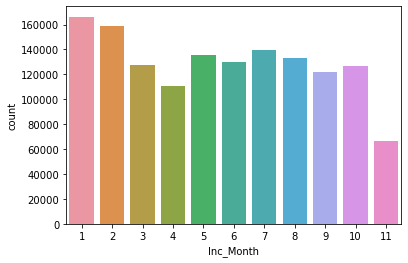

In [31]:
#Identify Count of Incidents Submitted Per Month
sns.countplot(x = 'Inc_Month', data = df3)

## CONCLUSION:  Covid significantly decreased the number of crimes immediately after its presense was detected in March/April

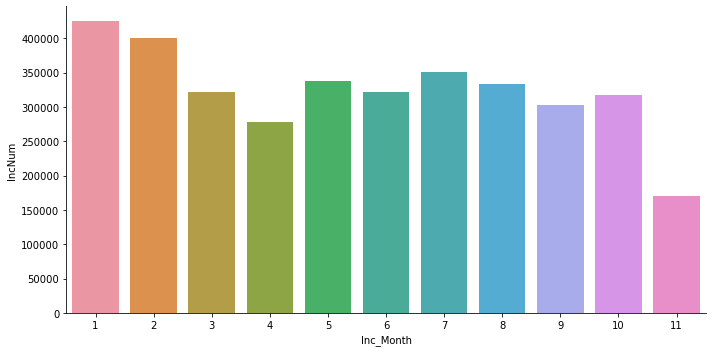

In [32]:
#Identify Count of Incidents Submitted Per Month
time = df3.groupby('Inc_Month').agg({'IncNum': 'sum'})
time = time.reset_index()
sns.catplot(x = 'Inc_Month', y = 'IncNum', data = time, kind = 'bar', aspect = 2)

## CONCLUSION:  Covid significantly decreased the severity of crime immediately after its presense was detected in March/April

##  Develop Groups in <span style="color:Green">Connection Data</span> to Analyze Crime & Price
-  Identify if there is a Correlation Between Crime (Count & Severity) & Price Per Sq Foot

In [33]:
#Group Connection Data by Neighborhood - Get Avg SqFt Price, Incident Count, Incident Severity

test = df3.groupby('Neighborhood').agg({'$/SQUARE FEET': 'mean', 'IncID': 'count'}).rename(\
        columns={'IncID':'Inc_Count','$/SQUARE FEET':'Avg_$/SqFt'})
test.reset_index(inplace = True)

test2 = df3.groupby('Neighborhood').agg({'IncNum': 'sum'}).rename(\
        columns={'IncNum':'Inc_Sum'})
test2.reset_index(inplace = True)

test3 = test.merge(test2, how = 'left')

#Rank How Neighboorhoods Place by the 3 derived Columns

test3['$/SqFt_Rank'] = test3['Avg_$/SqFt'].rank(ascending = False)
test3['Inc_Count_Rank'] = test3['Inc_Count'].rank(ascending = False)
test3['Inc_Sum_Rank'] = test3['Inc_Sum'].rank(ascending = False)

#Get how far off the 3 Derived Columns are from the Average for Each

#test3['Avg_$/SqFt'].mean()
#test3['Inc_Sum'].mean()
#test3['Inc_Count'].mean()

#test3['SqFt_Compare'] = test3['Avg_$/SqFt'].apply(lambda v: v - test3['Avg_$/SqFt'].mean())
#test3['Inc_Count_Compare'] = test3['Inc_Count'].apply(lambda v: v - test3['Inc_Count'].mean())
#test3['Inc_Sum_Compare'] = test3['Inc_Sum'].apply(lambda v: v - test3['Inc_Sum'].mean())

test3.head()


,Neighborhood,Avg_$/SqFt,Inc_Count,Inc_Sum,$/SqFt_Rank,Inc_Count_Rank,Inc_Sum_Rank
0,Bayview Hunters Point,836.835116,30657,75813.0,37.0,13.0,13.0
1,Bernal Heights,952.117867,24758,63236.0,25.0,17.0,17.0
2,Castro/Upper Market,993.085397,61902,157808.0,20.0,7.0,7.0
3,Chinatown,1165.663773,19975,48797.0,2.0,21.0,22.0
4,Excelsior,855.774039,19408,49659.0,33.0,22.0,21.0


In [34]:
#Normalize Delta Columns from Average
test3['SqFt_Norm'] = test3['Avg_$/SqFt'].apply(lambda v: (v - test3['Avg_$/SqFt'].min())/(test3['Avg_$/SqFt'].max() - test3['Avg_$/SqFt'].min()))
test3['Inc_Count_Norm'] = test3['Inc_Count'].apply(lambda v: (v - test3['Inc_Count'].min())/(test3['Inc_Count'].max() - test3['Inc_Count'].min()))
test3['Inc_Sum_Norm'] = test3['Inc_Sum'].apply(lambda v: (v - test3['Inc_Sum'].min())/(test3['Inc_Sum'].max() - test3['Inc_Sum'].min()))
test3.head()

,Neighborhood,Avg_$/SqFt,Inc_Count,Inc_Sum,$/SqFt_Rank,Inc_Count_Rank,Inc_Sum_Rank,SqFt_Norm,Inc_Count_Norm,Inc_Sum_Norm
0,Bayview Hunters Point,836.835116,30657,75813.0,37.0,13.0,13.0,0.177257,0.158514,0.180293
1,Bernal Heights,952.117867,24758,63236.0,25.0,17.0,17.0,0.438889,0.127128,0.149457
2,Castro/Upper Market,993.085397,61902,157808.0,20.0,7.0,7.0,0.531864,0.324753,0.381326
3,Chinatown,1165.663773,19975,48797.0,2.0,21.0,22.0,0.923527,0.101680,0.114056
4,Excelsior,855.774039,19408,49659.0,33.0,22.0,21.0,0.220239,0.098663,0.116170


In [35]:
test3.corr().iloc[[0], :]
test3.corr().iloc[[0], [1,2,4,5]]

,Avg_$/SqFt,Inc_Count,Inc_Sum,$/SqFt_Rank,Inc_Count_Rank,Inc_Sum_Rank,SqFt_Norm,Inc_Count_Norm,Inc_Sum_Norm
Avg_$/SqFt,1.0,0.427556,0.447827,-0.990098,-0.576328,-0.563438,1.0,0.427556,0.447827


,Inc_Count,Inc_Sum,Inc_Count_Rank,Inc_Sum_Rank
Avg_$/SqFt,0.427556,0.447827,-0.576328,-0.563438


## Heatmap Data Prep

##  <span style="color:blue">Police Data</span> heatmap Preperation

In [36]:
#[From previous section, in case we want to make heatmap specific changes]:
# Define Buckets with Different Crimes by Severity 
Heat_crime_sev = ['Arson', 'Assault', 'Burglary', 'Larceny Theft', 'Motor Vehicle Theft', 'Robbery', 'Sex Offense', 'Weapons Carrying Etc', 'Weapons Offense', 'Rape', 'Human Trafficking (A), Commercial Sex Acts', 'Homicide', 'Weapons Offence', 'Human Trafficking, Commercial Sex Acts', 'Human Trafficking (B), Involuntary Servitude']
Heat_crime_mod = ['Family Offense', 'Offences Against The Family And Children', 'Prostitution']
Heat_crime_low = ['Disorderly Conduct', 'Drug Offense', 'Malicious Mischief', 'Missing Person', 'Stolen Property', 'Vandalism', 'Drug Violation', 'Gambling']
Heat_crime_remove = ['Case Closure', 'Courtesy Report', 'Embesslement','Fire Report','Forgery And Counterfeiting','Fraud','Lost Property','Miscellaneous Investigation','Non-Criminal','Other','Other Miscellaneous','Other Offenses','Recovered Vehicle','Suicide','Suspicious Occ','Traffic Collision','Traffic Violation Arrest','Vehicle Misplaced','Warrant','Vehicle Impounded','Motor Vehicle Theft','Suspicious','Civil Sidewalks','Liquor Laws']


In [37]:
#[From previous section, in case we want to make heatmap specific changes]: 
# Define Function that Assigns Severity Number (1-3) to Each Crime Buckets
def incident2number(cm):
    if cm in Heat_crime_sev:
        return 3 # Most Severe
    elif cm in Heat_crime_mod:
        return 2 # Moderately Severe
    elif cm in Heat_crime_low:
        return 1 # Least Severe
    else:
        return nan # Not Applicable (Not Identified, Non-Impactful, or Midleading Data)

In [38]:
#Bucketing lat and long into 20 units via qcut to make significant points (vs small dots)
df3.Longitude = pd.qcut(df3.Longitude, 20, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])
df3.Latitude = pd.qcut(df3.Latitude, 20, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])

In [39]:
#Creating crime metric based off previous section 
df['CrimeByHeat'] = df['IncCat'].apply(incident2number)

#Latitude and longitudianl adjustments
df.Latitude = (df3['Latitude']) #latitude is crime latitude
df.Longitude = (df3['Longitude']) #Longitude is crime Longitude

#Creating crime metric based off previous section 
df['CrimeByHeat'] = df['IncCat'].apply(incident2number)

## <span style="color:Red">Real Estate</span> Heatmap preparation

In [40]:
#Using previous Lat and Long data from team analysis
df3.Latitude = (df3['LATITUDE']) #LATITUDE is realestate Latitude
df3.Longitude = (df3['LONGITUDE']) #LbONGITUDE is realestate Longitude

## <span style="color:purple">Additional Analysis</span> Trend Analysis Slope preperation

In [41]:
#in this section we will work with df_slopes, which is a copy of the police data
#We want to see where crime is trending in each neighborhood.
df_slopes.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2020/08/15 12:43:00 PM,2020/08/15,12:43,2020,Saturday,2020/08/15 12:58:00 PM,95308704134,953087,200490354,202281583.0,...,58.0,9.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,2.0
1,2018/01/18 07:00:00 PM,2018/01/18,19:00,2018,Thursday,2018/01/22 04:59:00 PM,64999771000,649997,186068683,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/08/16 03:13:00 AM,2020/08/16,03:13,2020,Sunday,2020/08/16 03:14:00 AM,95319604083,953196,200491669,202290313.0,...,54.0,2.0,9.0,26.0,NaN,NaN,NaN,NaN,NaN,2.0
3,2020/08/16 03:38:00 AM,2020/08/16,03:38,2020,Sunday,2020/08/16 04:56:00 AM,95326228100,953262,200491738,202290404.0,...,53.0,3.0,2.0,20.0,3.0,NaN,NaN,NaN,NaN,2.0
4,2020/08/15 09:40:00 AM,2020/08/15,09:40,2020,Saturday,2020/08/15 06:21:00 PM,95322706244,953227,206121692,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Drop unneeded columns
df_slopes  = df_slopes.drop(columns = ['Incident Date', 'Report Type Description', 'Incident Code', 'Supervisor District', 'Incident Time', 'Incident Year', 'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident Number', 'CAD Number', 'Report Type Code', 'Resolution', 'Intersection', 'CNN', 'point', 'SF Find Neighborhoods', 'Current Police Districts', 'Current Supervisor Districts', 'Analysis Neighborhoods', 'HSOC Zones as of 2018-06-05', 'OWED Public Spaces', 'Central Market/Tenderloin Boundary Polygon - Updated', 'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File', 'Areas of Vulnerability, 2016'], axis=1)

In [43]:
#rename columns
df_slopes.columns = ['IncTimeStamp', #Incident Datetime
             #dropped: 'IncDate', #Incident Date
             #dropped: 'IncTime', #Incident Time
             #dropped: 'IncYear', #Incident Time
             #dropped: 'IncDay', #Incident Day of Week
             #dropped: 'ReportDT', #Report Datetime
             #dropped: 'RowID', #Row ID
             'IncID', #Incident ID
             #dropped: 'IncNum', #Incident Number
             #dropped: 'CadNum', #CAD Number
             #dropped: 'ReportTC', #Report Type Code
             #dropped: 'ReportTD', #Report Type Description
             'FiledOnline', #Filed Online
             #dropped: 'IncCode',#Incident Code
             'IncCat', #Incident Category
             'IncSubCat', #Incident Sub Category
             'IncDes', #Incident Desciption
             #dropped: 'Resolution', #Resolution
             #dropped: 'Int', #Intersection
             #dropped: 'CNN', #CNN
             'PoliceDist', #Police District
             'Neighborhood', #Analysis Neighborhood
             #dropped: 'SupDist', #Supervisor District
             'Latitude', #Latitude
             'Longitude', #Longitude
             #dropped: 'point'] #Point (Geographical coordinates)
             #dropped: 'Neighbor', #SF Find Neighborhoods 
             #dropped: 'CPD', #Current Police Districts
             #dropped: 'CSD', #Current Supervisor Districts 
             #dropped: 'ANeighbor', #Analysis Neighborhoods
             #dropped: 'HSOC Zones as of 2018-06-05', 
             #dropped: 'OWED Public Spaces',
             #dropped: 'Central Market/Tenderloin Boundary Polygon - Updated',
             #dropped: 'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
             #dropped: 'Areas of Vulnerability, 2016'
             ]

In [44]:
#convert Dateimte to a timestemp, then create a Month and Date Column
df_slopes['Incident Datetime'] = pd.to_datetime(df_slopes['IncTimeStamp'], utc=True)
df_slopes['Month'] = df_slopes['Incident Datetime'].dt.month
df_slopes['Date'] = df_slopes['Incident Datetime'].dt.date

In [45]:
df_slopes.head()

,IncTimeStamp,IncID,FiledOnline,IncCat,IncSubCat,IncDes,PoliceDist,Neighborhood,Latitude,Longitude,Incident Datetime,Month,Date
0,2020/08/15 12:43:00 PM,953087,NaN,Assault,Simple Assault,Battery,Ingleside,Excelsior,37.716039,-122.440255,2020-08-15 12:43:00+00:00,8,2020-08-15
1,2018/01/18 07:00:00 PM,649997,True,Lost Property,Lost Property,Lost Property,Out of SF,NaN,NaN,NaN,2018-01-18 19:00:00+00:00,1,2018-01-18
2,2020/08/16 03:13:00 AM,953196,NaN,Assault,Aggravated Assault,"Firearm, Discharging in Grossly Negligent Manner",Bayview,Potrero Hill,37.754827,-122.397729,2020-08-16 03:13:00+00:00,8,2020-08-16
3,2020/08/16 03:38:00 AM,953262,NaN,Malicious Mischief,Vandalism,"Malicious Mischief, Breaking Windows",Mission,Mission,37.766540,-122.422044,2020-08-16 03:38:00+00:00,8,2020-08-16
4,2020/08/15 09:40:00 AM,953227,True,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Park,NaN,NaN,NaN,2020-08-15 09:40:00+00:00,8,2020-08-15


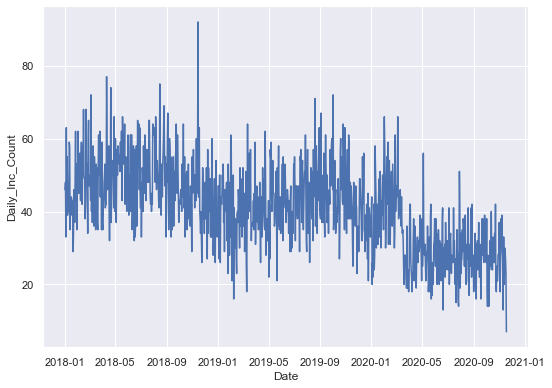

In [46]:
#Let's take a look at the Mission Neighborhood.
Mission = df_slopes[df_slopes.Neighborhood == 'Mission'].groupby('Date').agg({'IncID': 'count'})\
.rename(columns = {'IncID': 'Daily_Inc_Count'})
Mission.reset_index(inplace = True)
sns.set(rc={'figure.figsize':(8.7,6.27)})
sns.lineplot(x = 'Date', y = 'Daily_Inc_Count',data = Mission)
#the below chart shows the daily incident count per each date for the Mission Neighborhood

In [47]:
#This creates new datafram that groups incident count by Date and Neighbrohood
All_Neighborhood = df_slopes.groupby(['Date','Neighborhood']).agg({'IncID': 'count'})\
.rename(columns = {'IncID': 'Daily_Inc_Count'})
All_Neighborhood.reset_index(inplace = True)

In [48]:
#We create a new dataset that has the Std_Deviation for each neighborhood
Result = All_Neighborhood.groupby('Neighborhood').std()
Result.reset_index(inplace = True)
Result.rename(columns = {'Daily_Inc_Count': 'Std_Dev'}, inplace = True)
Result = Result.sort_values(by = 'Std_Dev', ascending = False)
Result.head()

,Neighborhood,Std_Dev
5,Financial District/South Beach,12.677686
18,Mission,11.841129
35,Tenderloin,11.703111
33,South of Market,9.793045
0,Bayview Hunters Point,6.394621


In [49]:
#In order to find the slopes we pivot the data
#Neighborhood is the index and is in sequential time order
#Each number you see is how mqny incidents there were per day
All_Neighborhood_New = All_Neighborhood.pivot_table(values = 'Daily_Inc_Count',index = 'Date',columns = 'Neighborhood',fill_value = 0)
All_Neighborhood_New.reset_index(inplace = True)
All_Neighborhood_New.drop(columns = ['Date'], inplace = True)
All_Neighborhood_New.head()

Neighborhood,Bayview Hunters Point,Bernal Heights,Castro/Upper Market,Chinatown,Excelsior,Financial District/South Beach,Glen Park,Golden Gate Park,Haight Ashbury,Hayes Valley,...,Russian Hill,Seacliff,South of Market,Sunset/Parkside,Tenderloin,Treasure Island,Twin Peaks,Visitacion Valley,West of Twin Peaks,Western Addition
0,33,5,13,18,16,44,1,3,13,20,...,17,0,38,13,39,1,1,6,9,19
1,27,9,7,11,1,26,2,3,10,8,...,2,0,34,10,35,0,0,3,9,15
2,16,5,7,11,5,34,1,7,5,7,...,13,1,43,10,42,1,0,6,4,17
3,23,7,9,9,9,52,2,10,6,7,...,10,1,34,15,65,0,0,11,3,9
4,35,10,23,2,5,39,1,5,6,10,...,8,1,30,16,59,1,0,1,9,18


In [50]:
#We then apply a lambda function to find the slope for each neighborhood
slopes = All_Neighborhood_New.apply(lambda x: np.polyfit(All_Neighborhood_New.index, x, 1)[0])
slopes = slopes.to_frame().reset_index()
slopes.rename(columns = {0 : 'Slopes'}, inplace = True)
slopes.sort_values(by = 'Slopes', inplace = True)

In [51]:
#We then use the merge function to see the slope and standard deviation for each neighborhod
Slopes_Std = slopes.merge(Result)
Slopes_Std.head()

,Neighborhood,Slopes,Std_Dev
0,Financial District/South Beach,-0.022817,12.677686
1,Mission,-0.022652,11.841129
2,South of Market,-0.016137,9.793045
3,Tenderloin,-0.013844,11.703111
4,North Beach,-0.008303,5.819637


In [52]:
Slopes_Std.Std_Dev.mean()
#this is the mean standard deviation for all neighborhoods

3.9356092005513283

In [53]:
Slopes_Std.Slopes.mean()
#this is the mean slope for all neighborhoods

-0.0030167489270571768

In [54]:
Slopes_Std[(Slopes_Std.Slopes < Slopes_Std.Slopes.mean()) & (Slopes_Std.Std_Dev < Slopes_Std.Std_Dev.mean())]
#Chinatown is the only neighborhood where the slope is decreasing more than the mean 
#and Chinatown is the only the only neighborhood where the standard deviation is less than the mean

,Neighborhood,Slopes,Std_Dev
5,Chinatown,-0.00354,3.852719


# <code style="background:yellow;color:black">Quality of Findings</code>

- # <code style="background:yellow;color:black">A Brief Summary</code>

- Ideally, only one sentence)addressed to the management. Points are awarded based on clarity and interestingness of the finding
- (5 pts per finding)

## Conclusion Pt1: Both the count of incidents and their severity are postively correlated with housing prices, however not as strong as we hypothesized
## Conclusion Pt2: The Rank of the neighborhood was a better indicator of the housing price than the count or severity of incidents

## Conclusion Pt3: The binned rank of the neighborhood is a stronger indicator than individual ranking of neighborhood.

- # <code style="background:yellow;color:black">A set of tables and/or charts</code>

 - support the validity of your finding.  
 - You must    include at least one chart. 
 - Points are awarded based on how convincing your  evidence is. 
 - (10 points per finding) 

##  <span style="color:blue">Police Data</span> heatmap [For Context/Understanding]

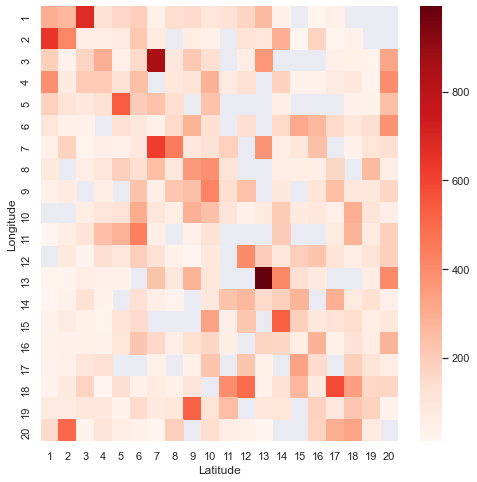

In [55]:
#Create predeterminded size
fig, ax = plt.subplots(figsize=(8,8))

#Creating heatmap, crime weighted by sum, red scale, no annotations
Heat_Map_Data = df.groupby(['Longitude', 'Latitude'])['CrimeByHeat'].sum().unstack()
Heatmap = sns.heatmap(Heat_Map_Data, cmap="Reds", annot=False)
plt.show()

## <span style="color:Red">Real Estate</span> Heatmap [For Context/Understanding]

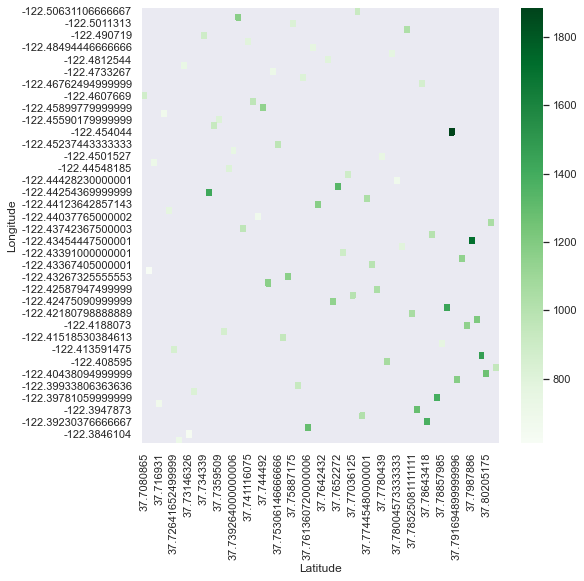

In [56]:
#creating predeterninted heatmap size
fig, ax = plt.subplots(figsize=(8,8)) 

#Using previous Lat and Long data from team analysis
df3.Latitude = (df3['LATITUDE']) #LATITUDE is realestate Latitude
df3.Longitude = (df3['LONGITUDE']) #LONGITUDE is realestate Longitude

#creating heatmap price per squarefoot, by average, using green scale, no annotations
Heat_Map_Data = df3.groupby(['Longitude','Latitude'])['$/SQUARE FEET'].mean().unstack()
Heatmap = sns.heatmap(Heat_Map_Data, cmap="Greens", annot=False)
plt.show()

## <span style="color:purple">Additional Analysis</span> Population Slope Table

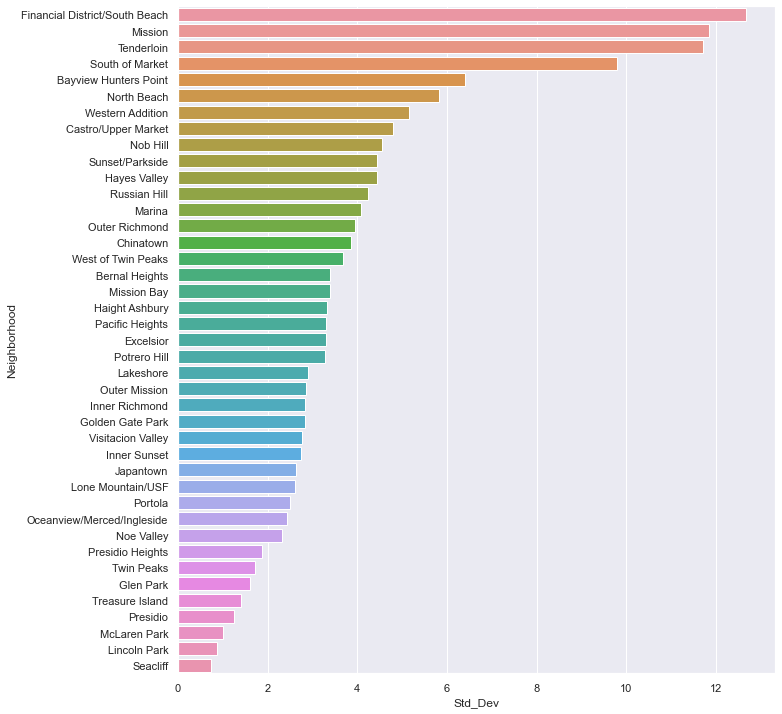

In [57]:
sns.set(rc={'figure.figsize':(10.7,12.27)})
sns.barplot(y = 'Neighborhood', x = 'Std_Dev', data = Result)

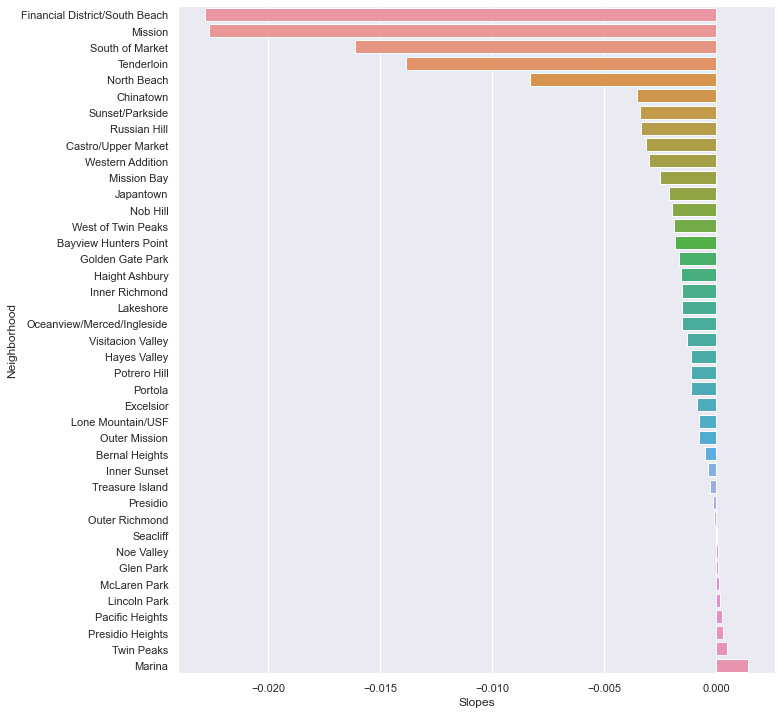

In [58]:
sns.set(rc={'figure.figsize':(10.7,12.27)})
sns.barplot(y = 'Neighborhood', x = 'Slopes', data = slopes)

##  Identify if there is a more Positive Correlation if Neighborhoods were Bucketed in the <span style="color:Green">Connection Data</span>

In [59]:
#Bucket Test3 DataFrame into 5 Buckets via qcut to see if there is a stronger correlation
test3['Inc_Sum_Rank_Bin'] = pd.qcut(test3.Inc_Sum_Rank, 5, labels=['1', '2', '3', '4', '5'])
test3['Inc_Sum_Rank_Bin'] = pd.to_numeric(test3['Inc_Sum_Rank_Bin'])

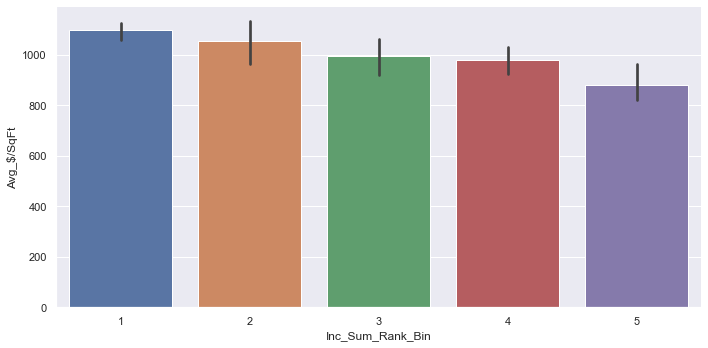

In [60]:
#Chart Unnormalized
sns.catplot(x = 'Inc_Sum_Rank_Bin', y = 'Avg_$/SqFt', data = test3, kind = 'bar', aspect = 2)

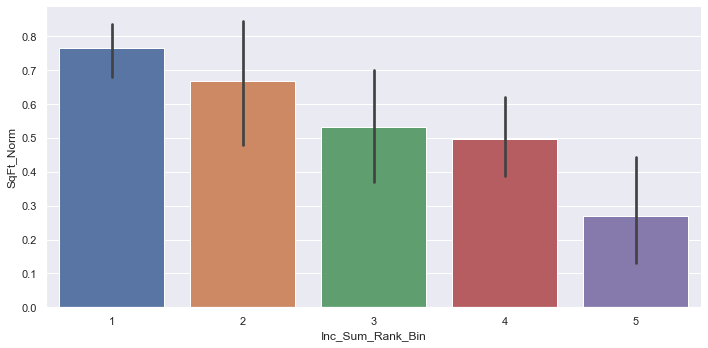

In [61]:
#Chart Normalized
sns.catplot(x = 'Inc_Sum_Rank_Bin', y = 'SqFt_Norm', data = test3, kind = 'bar', aspect = 2)

In [64]:
test3.corr().iloc[[0], :]
test3.corr().iloc[[0], [1,2,4,5,9]]

,Avg_$/SqFt,Inc_Count,Inc_Sum,$/SqFt_Rank,Inc_Count_Rank,Inc_Sum_Rank,SqFt_Norm,Inc_Count_Norm,Inc_Sum_Norm,Inc_Sum_Rank_Bin
Avg_$/SqFt,1.0,0.427556,0.447827,-0.990098,-0.576328,-0.563438,1.0,0.427556,0.447827,-0.599066


,Inc_Count,Inc_Sum,Inc_Count_Rank,Inc_Sum_Rank,Inc_Sum_Rank_Bin
Avg_$/SqFt,0.427556,0.447827,-0.576328,-0.563438,-0.599066


- # <code style="background:yellow;color:black">Managerial insights</code>

- Answer the “So what?” question.  
- That ims, convince the reader that your finding can be used to improve operations and increase 
- (5 points per finding)

## Conclusion: There is a slightly higher correlation between Price per SqFt and Incident Severity when one bins the ranks of Incident Severity for each Neighborhood

- ## Preliminary data suggests that crime does not have a strong impact on real estate pricing.

- ## It is hypothesized that the impact of crimes that take place around residential buildings are negated by building security. 

- ## As a result, other factors [economy, jobs, population density, entertainment] besides crime have a greater impact on housing prices and should be further examined and the impact of local "crime" has largely been minimized. Sales team should focus on building security and safety when investors/clients show concern about crime rates.

- ## In terms of crime outlook and investing, Chinatown is a promising investment neighborhood. 

## Why is the Correlation not Stronger?

In [65]:
print("Max Price Per SqFt: ")
test3['Avg_$/SqFt'].mean()

temp = test3[['Neighborhood', 'Avg_$/SqFt', 'Inc_Count', 'Inc_Sum']].sort_values(by = 'Inc_Count', ascending = False)
temp.sort_values('Inc_Sum', ascending = False).head(10)
#df4.groupby('Neighborhood').agg({'IncID': 'count'}).sort_values(by = 'IncID', ascending = False)
#below shows the neighborhoods ranked by number of incidents

Max Price Per SqFt: 


999.6640817716773

,Neighborhood,Avg_$/SqFt,Inc_Count,Inc_Sum
35,Tenderloin,1109.894874,188816,410146.0
18,Mission,1037.513229,160134,401891.0
33,South of Market,1116.265035,130011,314336.0
5,Financial District/South Beach,1158.761379,91281,237518.0
9,Hayes Valley,1107.187202,72060,190923.0
39,Western Addition,1119.597445,68861,176547.0
2,Castro/Upper Market,993.085397,61902,157808.0
20,Nob Hill,1126.084588,53742,136321.0
26,Pacific Heights,1117.932643,43885,116842.0
16,Marina,1131.289104,42521,114375.0


## Conclusion: There are other factors that impact housing price, such as proximity to jobs & there are other factors that impact crime, such as density of people